In [2]:
#  Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RandomizedSearchCV,
                                     GridSearchCV,
                                     KFold)
# encoding library
from sklearn.preprocessing import (OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler, KBinsDiscretizer, OrdinalEncoder)
from category_encoders import (BinaryEncoder)

from sklearn.compose import (ColumnTransformer, 
                             TransformedTargetRegressor)
from sklearn.pipeline import Pipeline

# model library
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import (StackingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor)

# metrics evaluation library
from sklearn.metrics import ( mean_absolute_error, 
                             r2_score, 
                             mean_absolute_percentage_error, 
                             root_mean_squared_error)

---
# Preprocessing
---

In [12]:
# import dataset
df = pd.read_csv('dataset/cleaned_data.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3623 entries, 0 to 3622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3623 non-null   object 
 1   Region       3623 non-null   object 
 2   Make         3623 non-null   object 
 3   Gear_Type    3623 non-null   object 
 4   Origin       3623 non-null   object 
 5   Options      3623 non-null   object 
 6   Year         3623 non-null   int64  
 7   Engine_Size  3623 non-null   float64
 8   Mileage      3623 non-null   int64  
 9   Price        3623 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 283.2+ KB


### **Define X & y**

* **X** is and variable or features include independent variables to predict the target such as `Type`, `Region`, `Make`, `Gear_Type`, `Origin`, `Options`, `Year`, `Engine_Size`, `Mileage`. 
* **y** is the target variable which is `Price` in this case

In [14]:
X = df.drop(columns='Price')
y = df['Price']

### **Data splitting**

In [15]:
# Divide train and test data with 80% for training and 20% for testing.

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

Shape of training data: (2898, 9)
Shape of testing data: (725, 9)


In [16]:
display(X_train, X_test, y_train, y_test)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage
176,X-Trail,Riyadh,Nissan,Automatic,Saudi,Standard,2018,2.5,30507
1779,Hilux,Riyadh,Toyota,Manual,Gulf Arabic,Full,2020,2.7,15000
422,Grand Marquis,Al-Medina,Mercury,Automatic,Other,Full,2007,4.6,179000
680,Attrage,Dammam,Mitsubishi,Automatic,Saudi,Standard,2019,1.2,19000
2846,Sunny,Riyadh,Nissan,Automatic,Saudi,Standard,2009,1.0,377000
...,...,...,...,...,...,...,...,...,...
1130,Prestige,Riyadh,Genesis,Automatic,Saudi,Standard,2016,3.8,165000
1294,Q5,Jeddah,Audi,Automatic,Saudi,Standard,2018,2.5,17000
860,Land Cruiser,Khobar,Toyota,Automatic,Saudi,Semi Full,2003,4.5,397000
3507,Hilux,Al-Baha,Toyota,Manual,Saudi,Full,2016,2.7,190000


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage
1703,Victoria,Dammam,Ford,Automatic,Saudi,Standard,2012,4.5,220000
1417,Impala,Riyadh,Chevrolet,Automatic,Gulf Arabic,Semi Full,2019,3.6,84000
1074,Charger,Dammam,Dodge,Automatic,Other,Full,2016,3.6,101000
670,Land Cruiser,Riyadh,Toyota,Automatic,Gulf Arabic,Semi Full,2003,1.0,479364
1770,Tahoe,Riyadh,Chevrolet,Automatic,Saudi,Standard,2016,5.3,194000
...,...,...,...,...,...,...,...,...,...
2592,Corolla,Tabouk,Toyota,Automatic,Gulf Arabic,Semi Full,2015,2.5,96000
2714,Sunny,Dammam,Nissan,Automatic,Saudi,Standard,2019,1.5,68000
2241,Impala,Riyadh,Chevrolet,Automatic,Saudi,Semi Full,2015,3.6,145462
2437,Rav4,Riyadh,Toyota,Automatic,Saudi,Standard,2018,2.5,56000


176      69500
1779    105500
422      24000
680      32000
2846     11000
         ...  
1130     84000
1294    138000
860      34000
3507     65000
3174    220000
Name: Price, Length: 2898, dtype: int64

1703     35000
1417     77000
1074     95000
670      35000
1770    116000
         ...  
2592     40000
2714     33000
2241     55000
2437     71000
528      20000
Name: Price, Length: 725, dtype: int64

### **Encoding & Scaling**

Generally, machine learning can't process categoric data. So we need to convert categorical data into numerical data. One of the method is **encoding**, which is a technique to convert categorical data into numerical data in order to computer can process and become usefull model ML. Encoding have several type and depend on the data. The categorical columns in this dataset are `Type, Region, Make, Gear_Type, Origin, Options`. Here are some encoding type that we use: 
* OnehotEncoding: [Gear_Type, Origin, Manufacture_Country] --> data that has unique value less than 10
* Binnaryencoding: [Type, Region, Make, Province] --> data that has unique value more than 10
* Ordinalencoding: [Options] --> data that has order

**scaling** in machine learning is the process of adjusting the range or scale of feature values ​​to be within a certain, more uniform range. we use scaler:
* RobustScaler: [Year, Engine_Size, 'Mileage'] --> data that has outlier and need to be scaled

In [17]:
transformer = ColumnTransformer([
  ('Robust', RobustScaler(), ['Year', 'Mileage', 'Engine_Size']),
  ('Onehot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin'] ),
  ('Binary', BinaryEncoder(),['Type', 'Region', 'Make']),
  ('Ordinal', OrdinalEncoder(), ['Options'])
], remainder='passthrough')


transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('Robust', RobustScaler(),
                                 ['Year', 'Mileage', 'Engine_Size']),
                                ('Onehot', OneHotEncoder(drop='first'),
                                 ['Gear_Type', 'Origin']),
                                ('Binary', BinaryEncoder(),
                                 ['Type', 'Region', 'Make']),
                                ('Ordinal', OrdinalEncoder(), ['Options'])])

---
# Model Selection
---

### **Models Benchmarking**

In [18]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
mean_rmse_score = []
std_rmse_score = []

score_mae = []
mean_mae_score = []
std_mae_score = []

score_mape = []
mean_mape_score = []
std_mape_score = []

score_R2 = []
mean_R2_score = []
std_R2_score = []

for i in models: 

  crossval = KFold(n_splits=5, shuffle=True, random_state=1)
  
  estimator = Pipeline([
    ('prepocessing', transformer),
    ('model', i)
  ])

  # RMSE
  model_cv_rmse = cross_val_score(
    estimator,
    X_train, 
    y_train, 
    cv=crossval, 
    scoring='neg_root_mean_squared_error',
    error_score='raise'
  )

  print(model_cv_rmse, i)

  score_rmse.append(model_cv_rmse)
  mean_rmse_score.append(model_cv_rmse.mean())
  std_rmse_score.append(model_cv_rmse.std())

  # MAE
  model_cv_mae = cross_val_score(
    estimator,
    X_train,
    y_train,
    cv=crossval,
    scoring='neg_mean_absolute_error',
    error_score='raise'
  )

  print(model_cv_mae, i)

  score_mae.append(model_cv_mae)
  mean_mae_score.append(model_cv_mae.mean())
  std_mae_score.append(model_cv_mae.std())

  # MAPE 
  model_cv_mape = cross_val_score(
    estimator,
    X_train,
    y_train,
    cv=crossval,
    scoring='neg_mean_absolute_percentage_error',
    error_score='raise'
  )

  print(model_cv_mape, i)

  score_mape.append(model_cv_mape)
  mean_mape_score.append(model_cv_mape.mean())
  std_mape_score.append(model_cv_mape.std())

  # R2
  model_cv_mape = cross_val_score(
    estimator,
    X_train,
    y_train,
    cv=crossval,
    scoring='r2',
    error_score='raise'
  )

  print(model_cv_mape, i)

  score_R2.append(model_cv_mape)
  mean_R2_score.append(model_cv_mape.mean())
  std_R2_score.append(model_cv_mape.std())


[-39922.30340563 -39815.39788563 -40586.73614123 -44198.19888506
 -43302.8537883 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-23149.39375152 -22838.18046459 -23875.06746318 -23719.77410144
 -23459.79890957] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.31102436 -0.33910034 -0.36485629 -0.33206924 -0.31590896] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.66309976 0.57879314 0.64003521 0.59639963 0.60311567] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-30234.55085939 -32190.94145626 -29826.25800784 -35048.39691735
 -32622.3454601 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           re

In [19]:
score_cv = pd.DataFrame({
  'Model' : ['Linear Regression','KNN Regressor', 'DecissionTree Regressor', 'RandomForestRegressor' ,'XGBoost Regressor'],
  'Mean_RMSE' : mean_rmse_score,
  'Std_RMSE' : std_rmse_score,
  'Mean_MAE' : mean_mae_score,
  'Std_MAE' : std_mae_score,
  'Mean_MAPE' : mean_mape_score,
  'Std_MAPE' : std_mape_score,
  'Mean_R2' : mean_R2_score,
  'Std_R2' : std_R2_score
})

score_cv.sort_values(by='Mean_MAE', ascending=False)

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
4,XGBoost Regressor,-28829.346123,2296.330053,-15176.187114,805.708063,-0.210939,0.009891,0.813530,0.033416
3,RandomForestRegressor,-30895.518271,2681.125756,-15941.598349,712.592058,-0.219912,0.009678,0.786708,0.034902
1,KNN Regressor,-31984.498540,1873.886855,-17848.536958,646.939497,-0.286953,0.007838,0.771599,0.032406
2,DecissionTree Regressor,-42718.560379,3374.361061,-22121.675677,967.784392,-0.329328,0.025847,0.591991,0.065367
0,Linear Regression,-41565.098021,1825.948080,-23408.442938,376.725031,-0.332592,0.019116,0.616289,0.030758


Evaluation metrics shown as value where lower value of the models indicate the better models. Based on the table above, **XGBoost Regresor** is the best model for this dataset. It has the lowest value of Mean Absolute Error (MAE) and Mean Squared Error (MSE) compared to the other models. XGBoost Regressor also become lowest std value of MAE and RMSE, suggesting it provides more consistent predictions compared to the other models.

### **Predict test data with benchmark models**

In [20]:
score_mae = []
score_rmse = []
score_mape = []
score_r2 = []

for i in [xgb, rf]:
  model = Pipeline([
  ('preprocessing', transformer),
  ('model', i)
  ])

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score_rmse.append(root_mean_squared_error(y_test, y_pred))
  score_mae.append(mean_absolute_error(y_test, y_pred))
  score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
  score_r2.append(r2_score(y_test, y_pred))

before_tunning_score = pd.DataFrame({'RMSE' : score_rmse, 'MAE' : score_mae,  'MAPE' : score_mape, 'R_square' : score_r2}, index=['XGBoostRegressor', 'RandomForestRegressor' ])
before_tunning_score.sort_values(by='MAE')


,RMSE,MAE,MAPE,R_square
XGBoostRegressor,27389.984486,15727.062561,0.250154,0.813468
RandomForestRegressor,29900.109186,16760.594303,0.256036,0.777712



Best Model: **XGBoostRegressor**

Reason:
It has the best performance metrics in terms of RMSE, MAE, and MAPE on the test data, indicating it generalizes better to unseen data.
While RandomForestRegressor performed well in cross-validation metrics, XGBoost outperformed it on the test set, which is critical for model selection.
Recommendation
Final Choice: Use the XGBoost Regressor for your regression tasks based on its superior performance metrics on both training and test datasets

In [21]:
xgb_score_mae = []
xgb_score_rmse = []
xgb_score_mape = []
xgb_score_r2 = []


model = Pipeline([
('preprocessing', transformer),
('model', xgb)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
xgb_score_rmse.append(root_mean_squared_error(y_test, y_pred))
xgb_score_mae.append(mean_absolute_error(y_test, y_pred))
xgb_score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
xgb_score_r2.append(r2_score(y_test, y_pred))

xgb_before_tunning_score = pd.DataFrame({'RMSE' : xgb_score_rmse, 'MAE' : xgb_score_mae,  'MAPE' : xgb_score_mape, 'R_square' : xgb_score_r2},  index=['XGBoost Regressor'])
xgb_before_tunning_score

,RMSE,MAE,MAPE,R_square
XGBoost Regressor,27389.984486,15727.062561,0.250154,0.813468


### **Hyperparameter Tunning**

In [22]:
# Kedalaman pohon
max_depth = list(np.arange(1, 21))

# Learning rate
learning_rate = list(np.arange(1, 31)/100)

# Number of trees
n_estimators = list(np.arange(100, 501))

# Row number for each tree (% from total rows train test)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Bigger value tend to be simple model 

# Number of the features that used for each trees (% from total columns train set)
colsample_bytree = list(np.arange(1, 11)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Bigger value tend to be simple model 

# reg_lambda = list(np.logspace(-3, 1, 10))

# min_child_weight = list(np.arange(1, 11))

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha,
    # 'model__reg_lambda': reg_lambda,
    # 'model__min_child_weight': min_child_weight
}

In [23]:
# Benchmark model with hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Make algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 100 ,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error',
    random_state = 1  
)

In [24]:
# Fitting tunned xgb
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Robust',
                                                                               RobustScaler(),
                                                                               ['Year',
                                                                                'Mileage',
                                                                                'Engine_Size']),
                                                                              ('Onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make']),
                                                                              ('Ordinal'...
                                                             np.float64(1.2915496650148828),
                                                             np.float64(3.593813663804626),
                                                             np.float64(10.0)],
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)]},
                   random_state=1, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [25]:
# See tuning result in dataframe form. Ordered by RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
62,1.157762,0.032071,0.040826,0.007394,0.5,3.593814,384,9,0.03,5,...,789.001075,1,-0.224215,-0.273014,-0.251479,-0.285627,-0.246277,-0.256122,0.021412,8
12,0.499765,0.039111,0.032755,0.009831,0.7,0.002783,386,5,0.04,8,...,626.277742,6,-0.224304,-0.258141,-0.257385,-0.271588,-0.232338,-0.248751,0.017614,4
37,0.444294,0.038644,0.029181,0.003268,0.7,10.000000,336,5,0.04,8,...,603.430667,8,-0.223125,-0.251958,-0.257325,-0.274813,-0.230796,-0.247603,0.018631,3
17,0.305906,0.022747,0.027687,0.004896,0.6,3.593814,160,6,0.09,8,...,746.182396,4,-0.226017,-0.265920,-0.261582,-0.280951,-0.234677,-0.253829,0.020407,7
76,0.281745,0.004135,0.020739,0.001483,0.6,0.001000,167,6,0.12,6,...,712.113393,9,-0.222663,-0.267139,-0.264684,-0.283597,-0.245601,-0.256737,0.020870,9


In [26]:
# Check the best score and params
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -14751.534296845339
Best_params: {'model__subsample': np.float64(0.5), 'model__reg_alpha': np.float64(3.593813663804626), 'model__n_estimators': np.int64(384), 'model__max_depth': np.int64(9), 'model__learning_rate': np.float64(0.03), 'model__gamma': np.int64(5), 'model__colsample_bytree': np.float64(0.5)}


In [27]:
# Model XGBoost
model = {'XGBoost Regressor': XGBRegressor(random_state=1)}

# Define model into best estimator
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Save metrics values RMSE, MAE & MAPE after tunning
rmse_xgb_tuning = root_mean_squared_error(y_test, y_pred_xgb_tuning)
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)


xgb_score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'R_square' : r2_xgb_tuning}, index=model.keys())

---
# Model Evaluation
---

In [28]:
display(xgb_before_tunning_score, xgb_score_after_tuning)

,RMSE,MAE,MAPE,R_square
XGBoost Regressor,27389.984486,15727.062561,0.250154,0.813468


,RMSE,MAE,MAPE,R_square
XGBoost Regressor,24953.764576,14079.796193,0.228435,0.845175


**Model Performance Comparison**
  * **MAE** improvement from 15727.06 --> 14079.79. Which is decrease 1.647.27, the decrease in MAE shows that the after tuning model has improved its predictive accuracy and produces smaller errors compared before tuning.
  * **MAPE** improvement from 0.25% become 0.22%. Which is decrease 0.03%, the small reduction in MAPE indicates a slight improvement in the model’s ability to make percentage-wise accurate predictions. While the improvement is relatively minor, it still reflects progress in the model's reliability.
  * **R2** improvement from 0.81 become 0.84. Which is increase 0.03, the improvement in R² from 0.81 to 0.84 indicates that the new model explains 3% more variance in the target variable than the previous model. This demonstrates a meaningful improvement in the model's overall fit to the data.

### **Learning Curve**

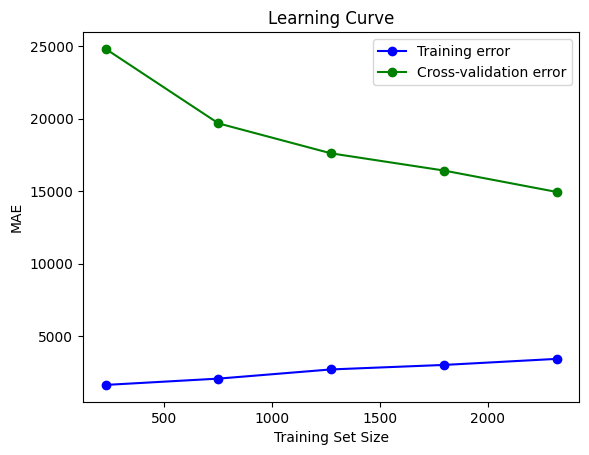

In [29]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(xgb_tuning, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training error")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation error")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("MAE")
plt.legend()
plt.show()

**Training Error**
  * The training error is very low and almost flat, increasing slightly as the training set size grows.

**Cross Val**
  * The cross-validation error starts high and decreases as the training set size increases, but it remains significantly higher than the training error.

**Coonclusion:**
  * The cross-validation error continues to decrease as more data is added, indicating that the model may benefit from even larger training sets.
  * However, the gap between the training error and validation error suggests that the model complexity or regularization needs improvement.

### **Residual Analysis**

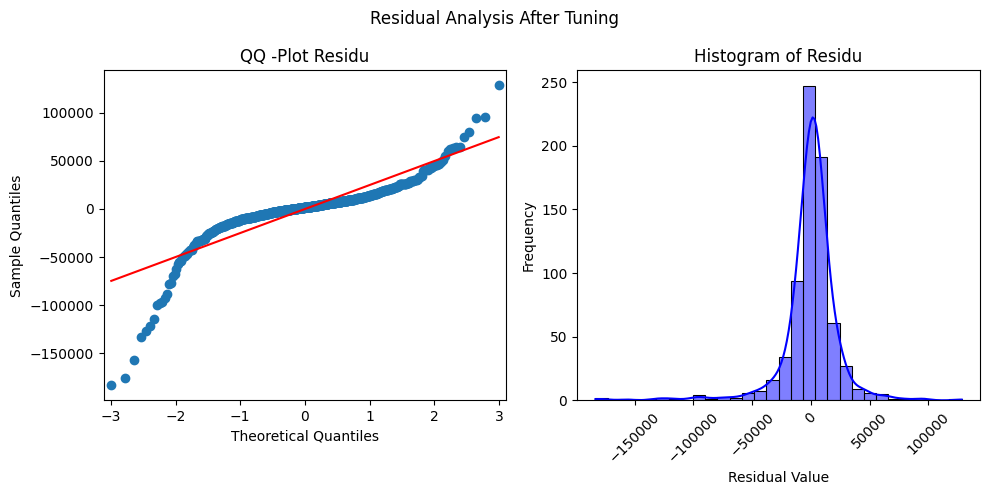

Shapiro-Wilk stat: 0.77, P-value: 8.13e-31


In [30]:
from scipy.stats import shapiro
import statsmodels.api as sm

result_tuning = pd.DataFrame({
  'y_test' : y_test,
  'y_pred' : y_pred_xgb_tuning
})

result_tuning['residu'] = y_pred_xgb_tuning-y_test

plt.figure(figsize=(10, 5))

# QQ-Plot
plt.subplot(1, 2, 1)
sm.qqplot(result_tuning['residu'], line='s', ax=plt.gca())
plt.title('QQ -Plot Residu')

# Histogram Residuals
plt.subplot(1, 2, 2)
sns.histplot(result_tuning['residu'], kde=True, bins=30, color='blue', edgecolor='k')
plt.xticks(rotation=45)
plt.title('Histogram of Residu')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

plt.suptitle('Residual Analysis After Tuning')
plt.tight_layout()
plt.show()

shapiro_stat, shapiro_p_value = shapiro(result_tuning['residu'])
print(f'Shapiro-Wilk stat: {shapiro_stat:.2f}, P-value: {shapiro_p_value:.2e}')

**QQ Plot of Residuals**
  * Linear Section in the Middle: The residuals in the middle of the QQ plot align well with the red diagonal line, indicating that for most of the data, the residuals are approximately normally distributed.
  * Deviations at the Tails: The tails of the distribution deviate significantly from the red line. This suggests the presence of extreme residuals (potentially outliers) or non-normality in the distribution of residuals.

**Histogram of Residuals**
  * Centered at Zero: The residuals are approximately centered around zero, which is good. This indicates that the model, on average, does not systematically overpredict or underpredict.
  * Wide Spread: The spread of residuals is quite large, with some values extending far into positive and negative ranges, indicating the presence of high variance or large errors for some predictions.

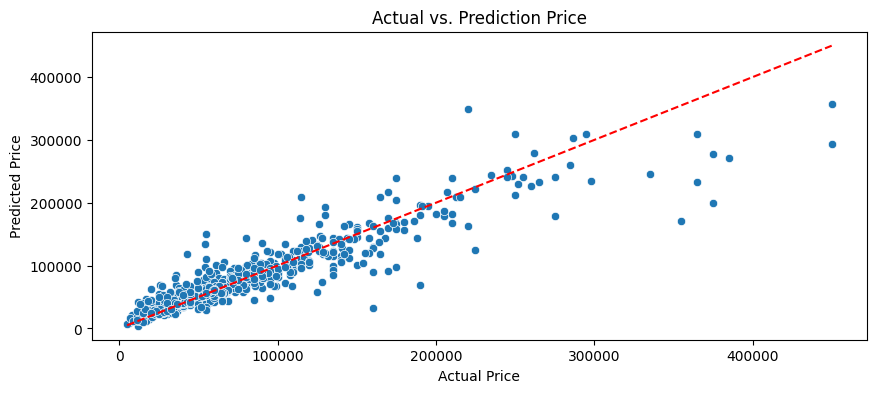

In [31]:
plt.figure(figsize=(10, 4))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

### **Feature Importance**

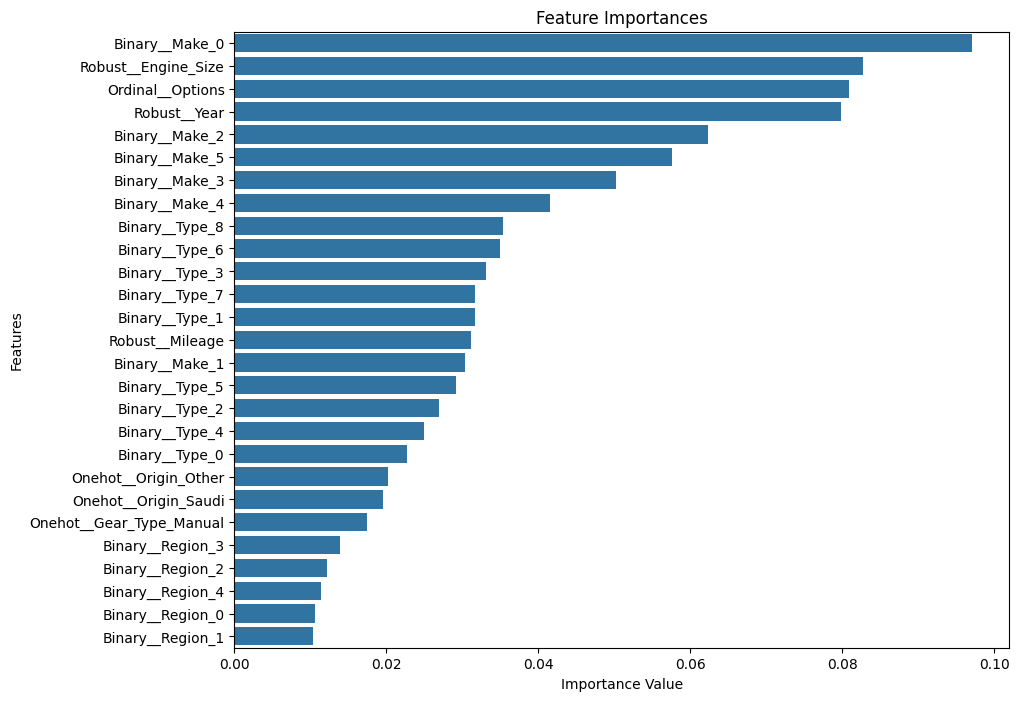

In [32]:
# Plot feature importances

feature_imp = pd.DataFrame(
    xgb_tuning['model'].feature_importances_,  
    index=xgb_tuning['preprocessing'].get_feature_names_out(), 
    columns=['Value']  
).sort_values(by='Value', ascending=False) 

# Plotting
plt.figure(figsize=(10, 8))  
sns.barplot(data=feature_imp, x='Value', y=feature_imp.index) 
plt.title('Feature Importances')  
plt.xlabel('Importance Value')  
plt.ylabel('Features')  
plt.show()  

**Insight:**

  **Top Contributing Features:**

  * Binary__Make_0: This feature has the highest importance, Its importance value is noticeably higher than all other features.
  * Robust__Engine_Size: The size of the engine appears to be a major predictor. This makes sense as engine size often directly impacts a vehicle's value, performance, and other characteristics.
  * Ordinal__Options: Options features become more important as the number of options increases. This is likely because more options often result in a higher price.

  **Low Contributing Features:**

  * Binary__Region_X: Regional variations seem less impactful compared to car make, year, and engine size.
  * Onehot__Gear_Type_Manual: This suggests that whether a car has manual or automatic transmission may not heavily impact the target variable for this dataset. 

**Shap Analysis**

In [33]:
import shap

columns = X.columns
prep = xgb_tuning['preprocessing']
prep.fit(X_train)

feature_names = list(prep.get_feature_names_out())
X_train_transformed = pd.DataFrame(prep.transform(X_train), columns=feature_names)
X_test_transformed = pd.DataFrame(prep.transform(X_test), columns=feature_names)

best_model = xgb_tuning['model']

100%|===================| 2895/2898 [04:21<00:00]        

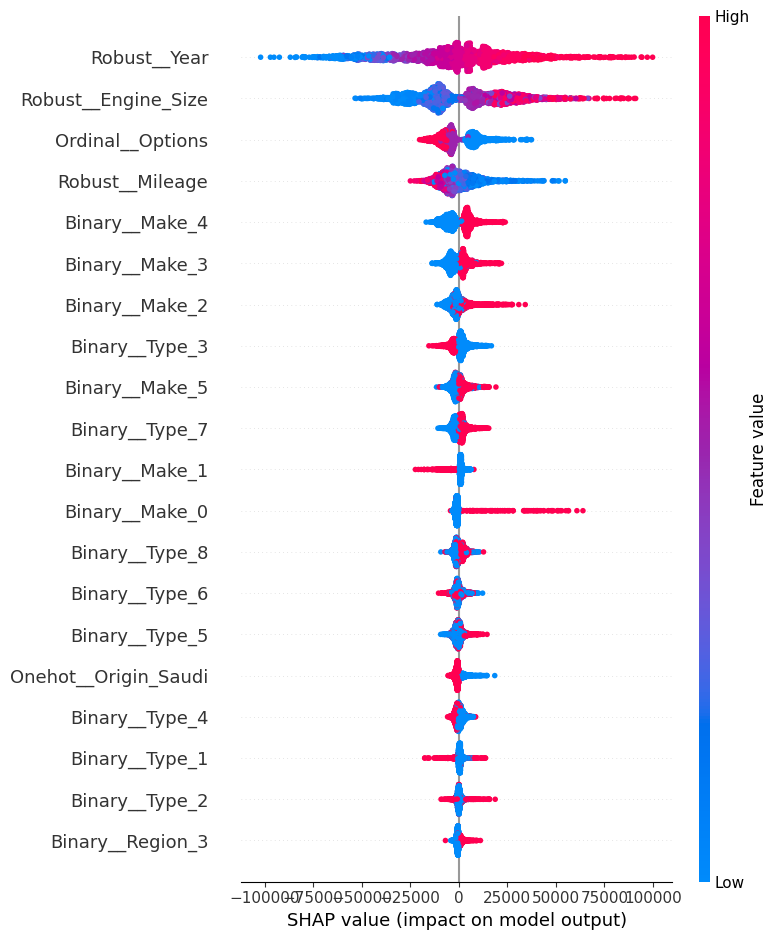

In [34]:
# # define explainer
explainer = shap.TreeExplainer(
    best_model,
    data = X_train_transformed,
    # feature_dependence="independent",
    # model_output="probability"    
)

# hitung shap value untuk tiap baris di data train
shap_values = explainer.shap_values(X_train_transformed)

# tampilkan dalam bentuk plot
shap.summary_plot(shap_values, X_train_transformed, feature_names = feature_names)

**Insight:**

Detail of SHAP Analysis:
  * **X-axis (SHAP Value)**
    The SHAP value quantifies the impact of a feature on the model's output. Positive SHAP values push the prediction higher, and negative SHAP values push it lower.
  * **Y-axis (Features)**
    The features are ranked from most important (top) to least important (bottom) based on their average SHAP value magnitude.
  * **Color (Feature Value)**
    The color scale represents the feature value. Red = High feature value, Blue = Low feature value.
    
Top Features:
  * Features like `Robust__Year, Robust__Engine_Size, and Robust__Mileage` are strong drivers of the model’s predictions, aligning with domain knowledge for used car pricing. These features are likely to be highly correlated with the car's condition and value.
  * High engine size and newer cars consistently increase price predictions, while high mileage decreases cars price predictions

In [35]:
shap.initjs()

In [36]:
def shap_plot(j, model, S):

    # define explainer
    explainerModel = shap.TreeExplainer(model)

    # shap value untuk baris tertentu
    shap_values_Model = explainerModel.shap_values(S)

    # force_plot
    p = shap.plots.force(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])

    return(p)

In [39]:
display(X_test.iloc[[50]], y_test.iloc[[50]])

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage
351,Patrol,Riyadh,Nissan,Automatic,Saudi,Semi Full,2015,5.6,219175


351    113500
Name: Price, dtype: int64

In [45]:
shap_plot(50, best_model, X_test_transformed)

**insight:**
* Base value in horizontal line represents the model's output prediction (around 77,450) as the reference point.
* Features like `Binary__Make_2` = 0, `Binary__Make_5` = 1, `Binary__Type_4` = 0, `Binary__Type_3` = 0, and `Robust__Engine_Size` = 1.45 increase the prediction significantly.
* Features like `Robust__Mileage` = 0.9021, `Ordinal__Options` = 1, and `Binary__Make_4` = 0 decrease the prediction value.
* The model's prediction result is 109,971.84, while actual price is 113,500


### Save Model

In [41]:
import pickle

# Training the Best Model (before saving)
xgb_tuning.fit(X_train,y_train)

# Saving Model
pickle.dump(xgb_tuning, open('Saudi-Used-Cars-XGB-ML-Regression-Model.pkl','wb'))

In [42]:
try:
    with open('Saudi-Used-Cars-XGB-ML-Regression-Model.pkl', 'rb') as model_file:
        load_model = pickle.load(model_file)
except FileNotFoundError:
    print("Model file not found.")
except pickle.UnpicklingError:
    print("Error unpickling the model.")

In [59]:
# try to predict dataset with 0 and 1 values
dataset = pd.read_csv('datase/ata_saudi_used_cars.csv') # load dataset
dataset = dataset[(dataset['Price'] == 0) | (dataset['Price'] == 1)] # filter dataset to only include 0 and 1 values
new_dataset = dataset.drop(columns=['Negotiable','Price']) # drop columns that are not relevant for prediction
dataset_test = new_dataset[~(dataset['Origin'] == 'Unknown')] # drop rows with unknown origin

In [46]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1753 entries, 0 to 5623
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         1753 non-null   object 
 1   Region       1753 non-null   object 
 2   Make         1753 non-null   object 
 3   Gear_Type    1753 non-null   object 
 4   Origin       1753 non-null   object 
 5   Options      1753 non-null   object 
 6   Year         1753 non-null   int64  
 7   Engine_Size  1753 non-null   float64
 8   Mileage      1753 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 137.0+ KB


In [47]:
predicted_data = load_model.predict(dataset_test)

In [48]:
dataset_test['Price'] = predicted_data
dataset_test.head(5)

C:\Users\User\AppData\Local\Temp\ipykernel_9800\2370114840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test['Price'] = predicted_data


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,25720.509766
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,135309.875000
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,31244.730469
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,66716.625000
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,40454.992188


---
# SUMMARY
---

## Limitations
* The model designed to predict used car prices for specific conditions:

      * **Location:** Saudi Arabia only.

      * **Price :** Price with a range of 5000-500.000, below or above that range, will affect model accuracy.
  
      * **Car type :** The dataset used has limitations on car type; the model will be affected if the car type is not in the dataset.
* The dataset has a large gap between 1980 and 2020; the model may not be accurate for years before 2000 since the amount of data is minimal.

## Conlcusion

* Algorithm: Among several models that we tried before, the XGboost Regressor model performed the best with MAE, RMSE, MAPE, and R2.
* After Tuning: We used randomized tuning as our method for increasing the model. The result is that the model's metrics (XGboost Regressor) increased even though it was not significant. This indicates that the model gives better prediction prices than before tuning.
* Feature Importances: We have two methods for checking feature importances: the first is model feature importances, and the second is SHAP analysis. They have different results because of the different processes used to calculate each feature. SHAP has more comprehensive calculations than model feature importances. `Binary__Make_0, Robust__Engine_Size, and Ordinal__Options` are the top contributing features of model feature importance. While in the SHAP model the feature importances are `Robust__Year, Robust__Engine_Size, and Robust__Mileage.`

## Recommendation
* **Add Features**

  As time progresses, the car industry and technology have grown rapidly. Thus, as businesses, we should also keep up with the pace. We should add more features to the dataset, such as GPS, fuel efficiency, and other safety features. This will make the dataset more comprehensive.
* **Update Dataset**

  We should update the dataset to include the latest models and features. This will ensure that the dataset is relevant and useful for the business. To make it more valid, we can limit or group the dataset, for instance, every 10 years.
* **Increase Data Quality**

  As we know, the dataset contains noise, such as unreasonable data and missing values. We should increase data quality by cleaning and preprocessing the data so we won't lose a lot of meaningful data.
* **Use Another Model**
  With trying another model expexted to improve the accuracy of the model.